In [119]:
import pandas as pd
import os
import os.path
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
import scipy 
from scipy.signal import find_peaks
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans

from AllPackage.PreProcessing import *

In [120]:
# leggo i file contunuti nella cartella Campioni_S_11x11 e acquisisco i nomi dei file
pathCampioni = '../Campioni _S_11x11/'
namefiles = [f for f in os.listdir(pathCampioni) if os.path.isfile(os.path.join(pathCampioni, f))]
namefiles

['S2_bkg_mapA_11x11.txt',
 'S1_mapA_11x11.txt',
 'S2_mapA_11x11.txt',
 'S1_bkg_mapA_11x11.txt']

In [121]:
# creo la variabile contenente i nomi delle colonne del pandas dataframe

columns = ['WaveNum']+[f'row{k}_point{i}' for k in range(1,12) for i in range(1,12)]


In [122]:
# creo i pandas dataframe dai file contenuti nella cartella Campioni_S_11x11

#for name in namefiles:
#    globals()['dataset_%s' % name[:-4]] = pd.read_csv('./Campioni _S_11x11/'+namefiles[0], delim_whitespace=True,names = columns)
    
data_S1_bkg = pd.read_csv(pathCampioni+namefiles[0], delim_whitespace=True,names = columns)
data_S1 = pd.read_csv(pathCampioni+namefiles[1], delim_whitespace=True,names = columns)
data_S2_bkg = pd.read_csv(pathCampioni+namefiles[2], delim_whitespace=True,names = columns)
data_S2 = pd.read_csv(pathCampioni+namefiles[3], delim_whitespace=True,names = columns)



In [123]:
#proviamo a fare un po' di preprocessing

S1_bkg_smooth = smooth_filter_savgol(data_S1_bkg,data_S1_bkg.columns)
#plot_spettri_pdf(S1_bkg_smooth,S1_bkg_smooth.columns,'./smooth_pdf/')
#plot_spettri_pdf(data_S1_bkg,data_S1_bkg.columns,'./pdf/')
[peaks_wn, peaks_int] = trova_picchi(data_S1_bkg,data_S1_bkg.columns)
#il trovapicchi sembra essere indip. da l'uso dello smooth
S1_bkg_smooth = norm_max_min(S1_bkg_smooth,S1_bkg_smooth.columns)
#prova di trasposizione
S1_bkg_trasp = transpose_df(S1_bkg_smooth)

Text(0.5, 0, 'Raman shift (cm$^{-1}$)')

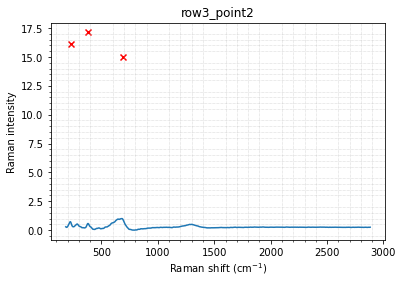

In [150]:
%matplotlib inline
fig = plt.figure();
    
ax = fig.add_subplot(1, 1, 1);
ax.plot(S1_bkg_smooth[S1_bkg_smooth.columns[0]],  S1_bkg_smooth[S1_bkg_smooth.columns[59]]);
ax.scatter(peaks_wn[59],peaks_int[59],color='r',marker='x')
ax.grid(which='minor', linestyle=':', linewidth=0.5);
ax.minorticks_on();

ax.set_title(S1_bkg_smooth.columns[24]);
ax.set_ylabel('Raman intensity')
ax.set_xlabel('Raman shift (cm$^{-1}$)')


In [125]:
pca = skl.decomposition.PCA(n_components=3)
StandardScaler = skl.preprocessing.StandardScaler()

In [173]:
data_S1_bkg_transp = pd.read_csv('../Data/Initial/S_11x11/data_S1_bkg.csv', index_col = 0)


In [126]:
StandardScaler.fit_transform(S1_bkg_trasp)
asd = pca.fit(S1_bkg_trasp)

In [174]:
data_S1_bkg_transp

,row1_point1,row1_point2,row1_point3,row1_point4,row1_point5,row1_point6,row1_point7,row1_point8,row1_point9,row1_point10,...,row11_point2,row11_point3,row11_point4,row11_point5,row11_point6,row11_point7,row11_point8,row11_point9,row11_point10,row11_point11
WaveNum,,,,,,,,,,,,,,,,,,,,,
184.0,5.175563,0.557762,2.521486,2.814473,65.199639,3.088385,3.475387,0.646484,1.811470,1.546292,...,2.359644,2.027207,7.250762,28.540762,98.178110,7.491725,46.729228,2.494720,50.940049,10.320347
185.0,5.275470,1.929328,2.746965,3.361994,68.465415,3.884448,3.064310,0.424809,1.661244,1.177667,...,2.787007,1.949855,7.158673,30.498764,101.351340,7.788411,48.232647,2.398466,55.591467,10.830112
186.0,5.253011,2.377681,2.800158,3.490593,68.643559,4.153700,2.858666,0.377997,1.672730,1.058914,...,2.901355,1.883286,7.033461,30.857384,100.492920,7.895561,48.429484,2.347206,57.206315,10.896806
187.0,5.108413,2.904581,2.913542,3.663829,69.483427,4.369849,2.575576,0.377236,1.877589,1.000951,...,2.833496,1.767500,6.871050,31.920835,99.761597,8.188754,48.437443,2.386473,60.837980,11.327653
188.0,4.700876,3.431034,3.131789,3.883881,71.443117,4.359468,2.195480,0.499744,2.510701,1.122901,...,2.310426,1.567416,6.670511,34.234432,98.999408,8.838512,47.843326,2.651271,68.466756,12.513384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2878.0,5.415079,3.568556,3.855907,3.959122,70.511426,5.931479,3.668615,1.233511,3.348330,1.859995,...,3.502570,2.854098,4.300144,35.347567,28.700825,11.056813,30.480803,2.075323,13.695701,18.477462
2879.0,5.639405,3.505428,3.652884,3.798407,70.605296,5.690042,3.742478,1.324650,3.103342,1.639248,...,3.828726,2.788929,4.428703,32.349923,22.474033,11.068592,29.616663,2.153138,13.705198,18.672376
2880.0,5.713820,3.433063,3.349874,3.801297,70.897748,5.512102,3.727246,1.469799,2.993024,1.415974,...,4.033337,2.795403,4.403186,30.228311,17.936907,11.105476,29.021608,2.266628,13.645001,18.416589


In [127]:
wow = asd.transform(S1_bkg_trasp)
asd.explained_variance_ratio_

array([0.72267085, 0.08827358, 0.04147336])

In [128]:
#esp (la distanza tra punti interni) è il parametro più influente con cui giocare

In [146]:
clusterDB = DBSCAN(eps=3, min_samples=5).fit_predict(wow)
clusterKM = KMeans(n_clusters=2).fit(wow)

In [149]:
clusterKM.score?

Signature: clusterKM.score(X, y=None, sample_weight=None)
Docstring:
Opposite of the value of X on the K-means objective.

Parameters
----------
X : {array-like, sparse matrix} of shape (n_samples, n_features)
    New data.

y : Ignored
    Not used, present here for API consistency by convention.

sample_weight : array-like of shape (n_samples,), default=None
    The weights for each observation in X. If None, all observations
    are assigned equal weight.

Returns
-------
score : float
    Opposite of the value of X on the K-means objective.
File:      ~/miniconda3/envs/envDS/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py
Type:      method


In [131]:
color = []
for x in clusterKM:
    if(x==0):
        color.append('r')
    if(x==1):
        color.append('g')
    if(x==2):
        color.append('b')
    if(x==3):
        color.append('y')
    if(x==4):
        color.append('m')
    if(x==-1):
        color.append('k')

In [132]:
len(color)

121

In [140]:
%matplotlib qt

fig = plt.figure();

X=wow[:,0]
Y=wow[:,1]
Z=wow[:,2]

ax = fig.add_subplot(111,projection='3d');
ax.scatter(X, Y, Z, c=color, marker='x')
ax.grid(which='minor', linestyle=':', linewidth=0.5);

ax.minorticks_on();

ax.set_title(S1_bkg_smooth.columns[24]);
ax.set_ylabel('PC1')
ax.set_xlabel('PC0')
ax.set_zlabel('PC2')



Text(0.5, 0, 'PC2')

In [136]:
os.getcwd()

'/home/ksatn/ProgettoDataScience/NoteBook'

In [139]:
data_S1.to_csv('./data_S1.txt')